LDA Model

[(0, '0.224*"slots" + 0.077*"free" + 0.074*"for" + 0.065*"at" + 0.063*"covidvaccine" + 0.063*"availability" + 0.039*"1844" + 0.034*"0" + 0.028*"urban" + 0.027*"bbmp"'), (1, '0.184*"covaxin" + 0.083*"oct" + 0.083*"covishield" + 0.026*"sputnik" + 0.025*"v" + 0.023*"to" + 0.023*"the" + 0.023*"who" + 0.019*"dose…" + 0.019*"20"'), (2, '0.168*"age" + 0.168*"pincode" + 0.149*"2021" + 0.149*"fees" + 0.021*"₹1200" + 0.018*"44" + 0.012*"04" + 0.011*"06" + 0.009*"hos…" + 0.007*"08"'), (3, '0.100*"18" + 0.094*"and" + 0.090*"all" + 0.088*"above" + 0.077*"ages" + 0.051*"1" + 0.050*"₹1410" + 0.048*"bengaluru" + 0.036*"sep" + 0.027*"paid"'), (4, '0.492*"date" + 0.072*"25" + 0.020*"03" + 0.015*"scan…" + 0.013*"560100" + 0.011*"data" + 0.010*"health" + 0.009*"mohfwindia" + 0.009*"26" + 0.009*"today"'), (5, '0.333*"2" + 0.204*"50" + 0.015*"sunny" + 0.011*"ages…" + 0.009*"19" + 0.008*"560097" + 0.008*"dia…" + 0.007*"doctorsoumya" + 0.006*"meet" + 0.005*"medical"'), (6, '0.471*"dose" + 0.065*"30

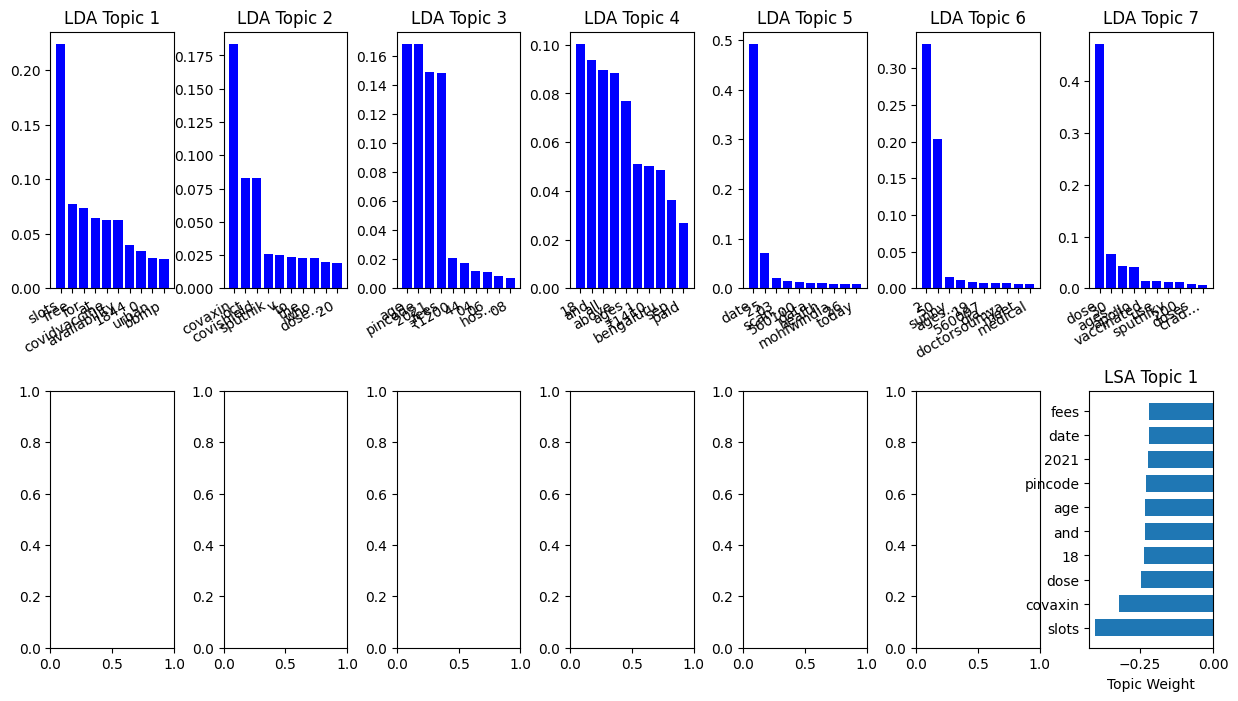

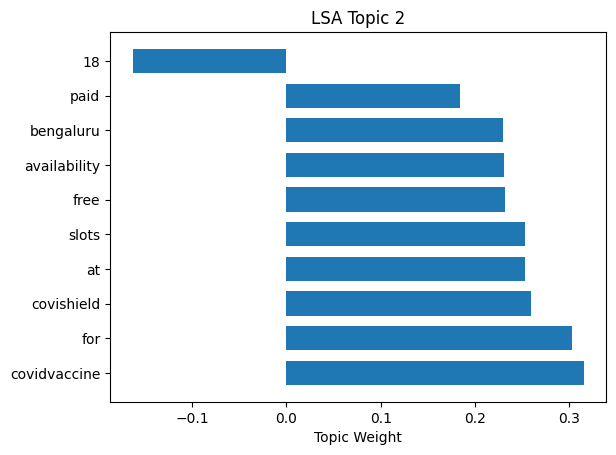

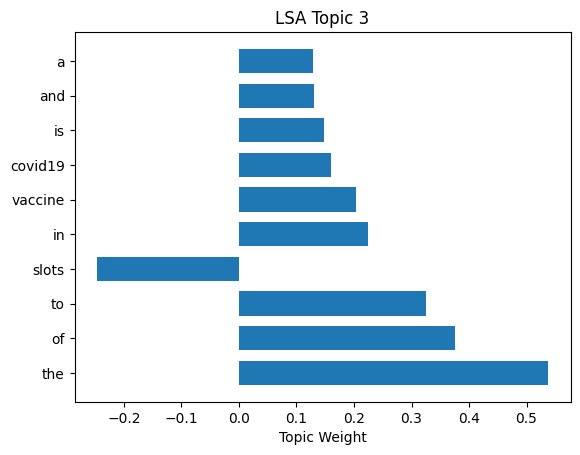

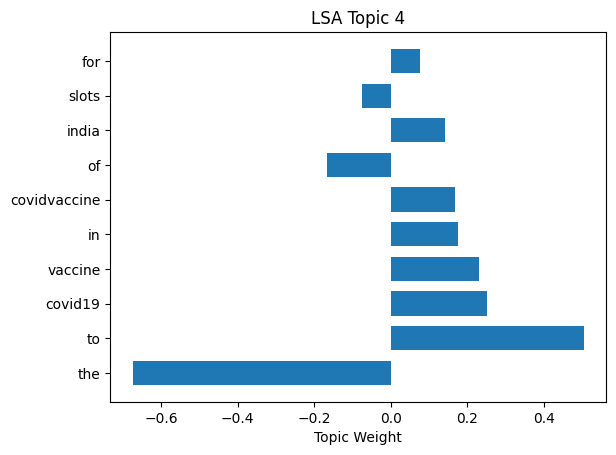

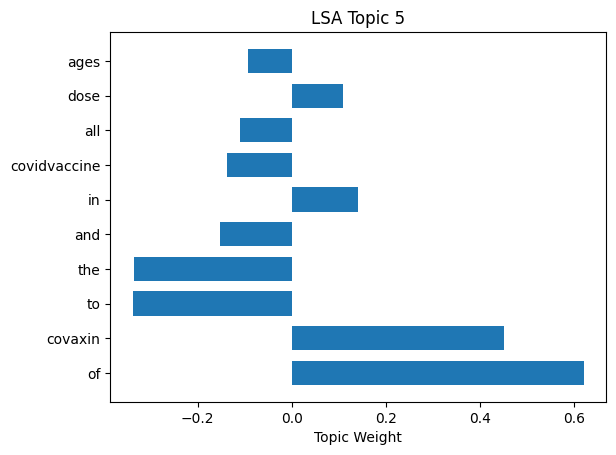

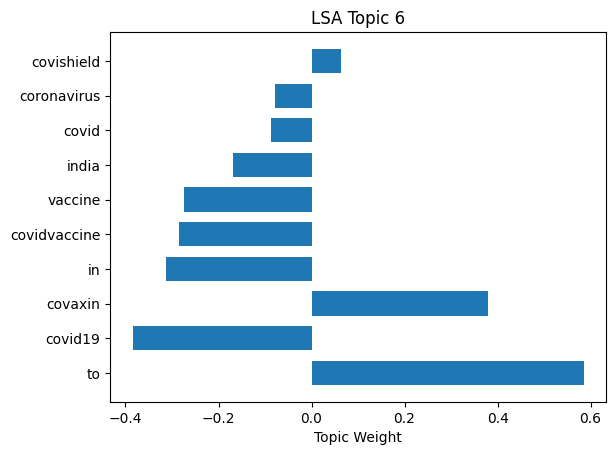

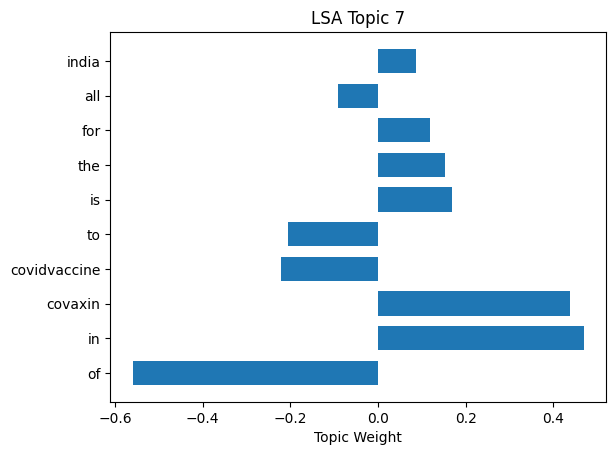

In [5]:
import pandas as pd
import string
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from gensim.models.coherencemodel import CoherenceModel

import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/India_BTMSET.csv')

def generate_topics(df, num_topics):
    # check for NaN values and replace with empty strings
    df['text'] = df['text'].fillna('')

    # remove special characters and punctuations
    df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    # convert text to lowercase
    df['text'] = df['text'].apply(lambda x: x.lower())

    # tokenize words
    tokenized = df['text'].apply(lambda x: x.split())

    # create a dictionary from the words
    dictionary = corpora.Dictionary(tokenized)

    # create a bag of words representation of the corpus
    corpus = [dictionary.doc2bow(text) for text in tokenized]

    # generate the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

    # generate the LSA model
    lsa_model = gensim.models.lsimodel.LsiModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)

    #return lda_model, lsa_model
    print('LDA Model\n')
    print(lda_model.print_topics())
    print(lda_model.print_topics()[0])

    print('\nLSA Model')
    #return lda_model, lsa_model
    print(lsa_model.print_topics())
    print(lsa_model.print_topics()[0])


    # get the top 10 words for each topic in LDA
    lda_topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
    lda_words = [[word[0] for word in topic[1]] for topic in lda_topics]
    lda_topic_words = [', '.join(words) for words in lda_words]

    # get the top 10 words for each topic in LSA
    lsa_topics = lsa_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
    lsa_words = [[word[0] for word in topic[1]] for topic in lsa_topics]
    lsa_topic_words = [', '.join(words) for words in lsa_words]

    # plot the topics
    fig, axs = plt.subplots(2, num_topics, figsize=(15, 8))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # LDA topics
    for i in range(num_topics):
        axs[0][i].bar(range(len(lda_words[i])), [val[1] for val in lda_topics[i][1]], color='b', align='center')
        axs[0][i].set_xticks(range(len(lda_words[i])))
        axs[0][i].set_xticklabels(lda_words[i], rotation=30, ha='right')
        axs[0][i].set_title('LDA Topic ' + str(i+1))

    # LSA topics
    for i in range(num_topics):
        topic_terms = []
        for term in lsa_model.show_topic(i):
            topic_terms.append(term[0])
        plt.barh(range(len(topic_terms)), [val[1] for val in lsa_model.show_topic(i)], height=0.7)
        plt.title("LSA Topic {}".format(i+1))
        plt.yticks(range(len(topic_terms)), topic_terms)
        plt.xlabel("Topic Weight")
        plt.show()

generate_topics(df,7)


